In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [33]:
users = pd.read_csv('users.tsv',sep='\t')
history = pd.read_csv('history.tsv',sep='\t')
validate = pd.read_csv('validate.tsv',sep='\t')
validate_answers = pd.read_csv('validate_answers.tsv',sep='\t')
features = pd.DataFrame()

In [4]:
def box_plot(data):
  fig = plt.figure(figsize=(12, 8))
  ax = plt.subplot()
  ax.boxplot(data)
  ax.set_title('Диаграмма размаха')
  ax.yaxis.grid(which='both')
  ax.set_xticks(np.arange(1, len(data.columns) + 1), data.columns)

## Первичный анализ 

### users

{'whiskers': [<matplotlib.lines.Line2D at 0x268834035d0>,
 'caps': [<matplotlib.lines.Line2D at 0x26883613c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x2688360e150>],
 'medians': [<matplotlib.lines.Line2D at 0x26883612dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26883610b10>],
 'means': []}

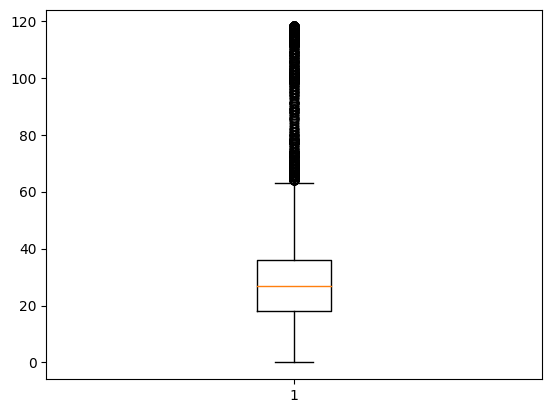

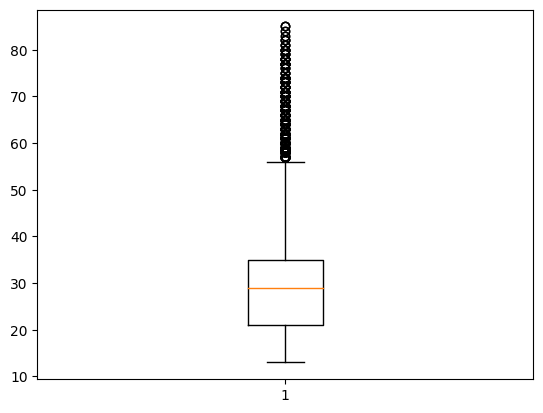

In [48]:
plt.boxplot(users['age'])
features['age'] = users['age']
features['age'] = features['age'].apply(lambda x: x if 12 <= x <= 85 else np.nan)
age_mean = round(features['age'].mean())
features['age'] = features['age'].fillna(age_mean)

plt.figure()
plt.boxplot(features['age'])

Стоит удалить нереальный возраст (до 12 лет и больше 90) и заполнить пропуски

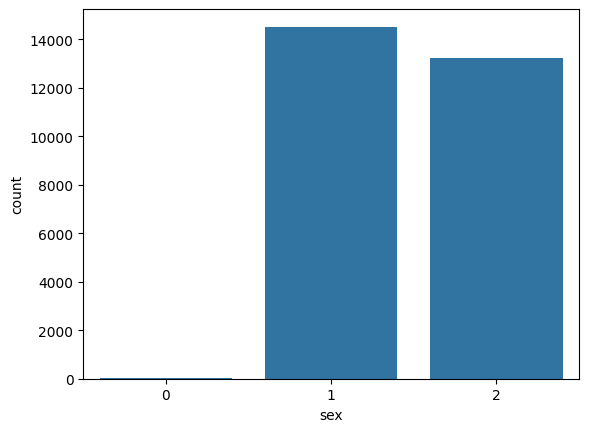

In [49]:
sns.countplot(x='sex', data=users)
features['sex'] = users['sex']

In [ ]:
print("Самые частые города: " + str(users['city_id'].value_counts().head(10)))
big_cities = users['city_id'].value_counts()
print(big_cities[3])
features['big_city'] = users['city_id']
features['big_city'] = users['city_id'].apply(lambda x: 1 if big_cities[x] >= 500 else 0)
features['medium_city'] = users['city_id'].apply(lambda x: 1 if 500 > big_cities[x] >= 150 else 0)
features['small_city'] = users['city_id'].apply(lambda x: 1 if 150 > big_cities[x] else 0)
features.head()

Самые частые города: city_id
0      8479
3      1985
7      1232
25      315
19      308
60      285
8       262
21      250
201     249
67      237
Name: count, dtype: int64
1985


,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4


Возможно есть корреляция с тем в каком городе живет пользователь (маленький/средний/большой)

### history

<Axes: xlabel='publisher', ylabel='count'>

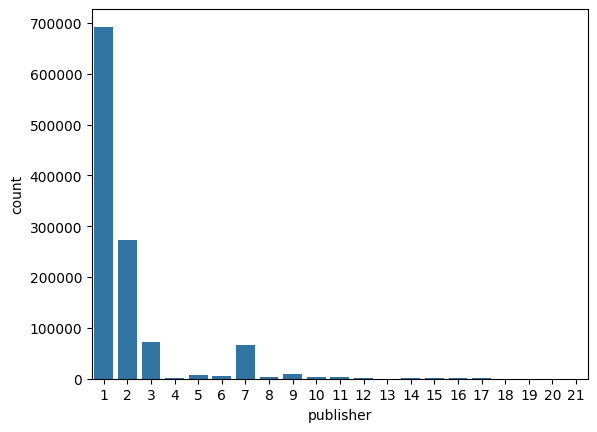

In [52]:
sns.countplot(x='publisher', data=history)

У 1 и 2 площадок наибольшая корреляция с прогнозом

In [ ]:
features['publisher_1'] = history['publisher'].apply(lambda x: 1 if x == 1 else 0)
features['publisher_2'] = history['publisher'].apply(lambda x: 1 if x == 2 else 0)

,age,sex,big_city,medium_city,small_city,publisher_1,publisher_2
0,19.0,2,1,0,0,1,0
1,29.0,1,0,0,1,1,0
2,24.0,2,0,0,1,1,0
3,20.0,1,1,0,0,1,0
4,29.0,2,0,0,1,0,1


### validate

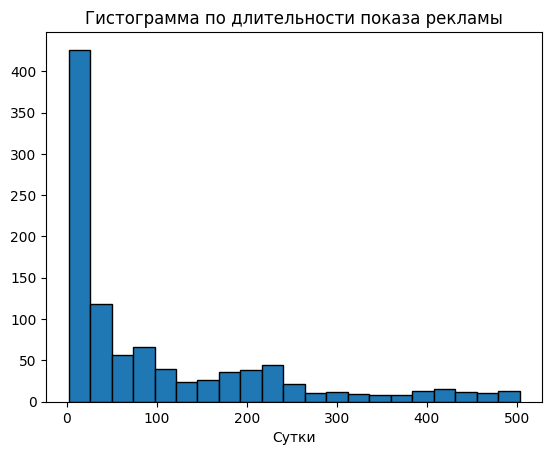

[ 0.          0.48979592  0.97959184  1.46938776  1.95918367  2.44897959
  2.93877551  3.42857143  3.91836735  4.40816327  4.89795918  5.3877551
  5.87755102  6.36734694  6.85714286  7.34693878  7.83673469  8.32653061
  8.81632653  9.30612245  9.79591837 10.28571429 10.7755102  11.26530612
 11.75510204 12.24489796 12.73469388 13.2244898  13.71428571 14.20408163
 14.69387755 15.18367347 15.67346939 16.16326531 16.65306122 17.14285714
 17.63265306 18.12244898 18.6122449  19.10204082 19.59183673 20.08163265
 20.57142857 21.06122449 21.55102041 22.04081633 22.53061224 23.02040816
 23.51020408 24.        ]


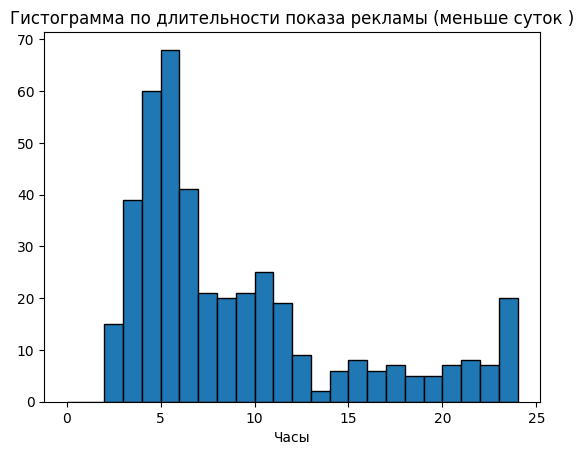

In [56]:
validate['duration'] = validate['hour_end'] - validate['hour_start']

plt.title('Гистограмма по длительности показа рекламы')
plt.hist(validate['duration'], bins=round(max(validate['duration'])/24), edgecolor='black')
plt.xlabel('Сутки')
plt.show()

plt.title("Гистограмма по длительности показа рекламы (меньше суток )")
plt.xlabel('Часы')
filtered_duration = validate.loc[validate['duration'] <= 24, 'duration']
plt.hist(filtered_duration, bins=np.arange(0, 25), edgecolor='black')
print(np.linspace(0, 24))

In [57]:
features['duration'] = validate['duration']
features['more_than_day'] = validate['duration'].apply(lambda x: 1 if x > 24 else 0)

features['audience_size'] = validate['audience_size']

(array([252.,  85., 163., 112., 125.,  69.,  42.,  55.,  42.,  63.]),
 array([ 300.,  520.,  740.,  960., 1180., 1400., 1620., 1840., 2060.,
        2280., 2500.]),
 <BarContainer object of 10 artists>)

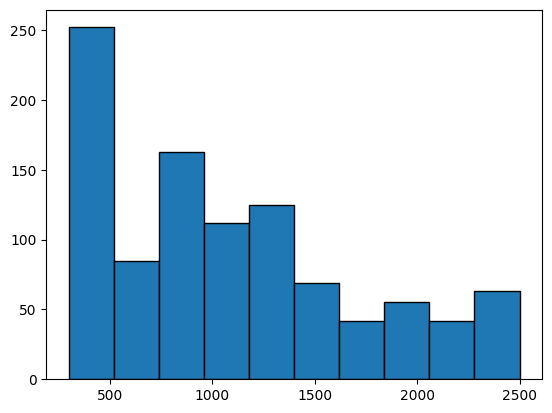

In [58]:
plt.hist(validate['audience_size'], edgecolor='black')

In [60]:
features['at_least_one'] = validate_answers['at_least_one']
features['at_least_two'] = validate_answers['at_least_two']
features['at_least_three'] = validate_answers['at_least_three']

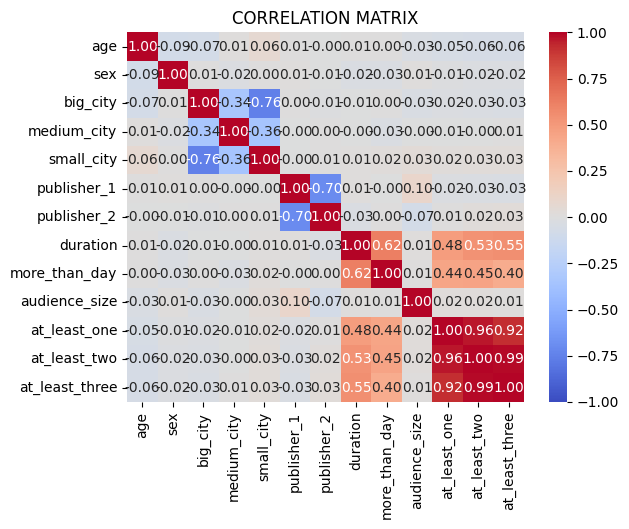

In [61]:
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('CORRELATION MATRIX')
plt.show()